Epoch 1/50, Loss: 23.808324813842773
Epoch 2/50, Loss: 23.808324813842773
Epoch 3/50, Loss: 23.808324813842773
Epoch 4/50, Loss: 23.808324813842773
Epoch 5/50, Loss: 23.808324813842773
Epoch 6/50, Loss: 23.808324813842773
Epoch 7/50, Loss: 23.808324813842773
Epoch 8/50, Loss: 23.808324813842773
Epoch 9/50, Loss: 23.808324813842773
Epoch 10/50, Loss: 23.808324813842773
Epoch 11/50, Loss: 23.808324813842773
Epoch 12/50, Loss: 23.808324813842773
Epoch 13/50, Loss: 23.808324813842773
Epoch 14/50, Loss: 23.808324813842773
Epoch 15/50, Loss: 23.808324813842773
Epoch 16/50, Loss: 23.808324813842773
Epoch 17/50, Loss: 23.808324813842773
Epoch 18/50, Loss: 23.808324813842773
Epoch 19/50, Loss: 23.808324813842773
Epoch 20/50, Loss: 23.808324813842773
Epoch 21/50, Loss: 23.808324813842773
Epoch 22/50, Loss: 23.808324813842773
Epoch 23/50, Loss: 23.808324813842773
Epoch 24/50, Loss: 23.808324813842773
Epoch 25/50, Loss: 23.808324813842773
Epoch 26/50, Loss: 23.808324813842773
Epoch 27/50, Loss: 23

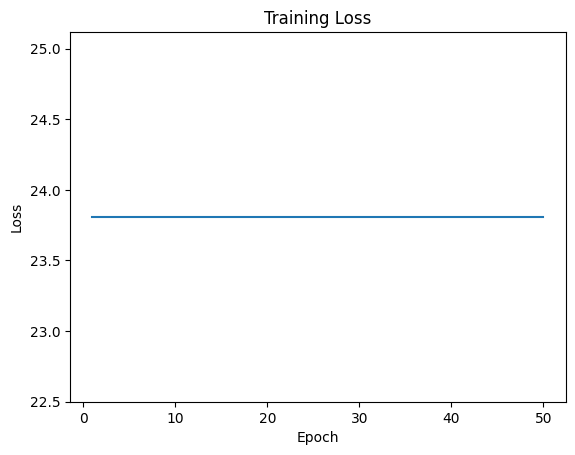

Precision on test set: 0.15
Accuracy on test set: 0.39
Recall on test set: 0.39
F1 Score on test set: 0.22


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32 )
y_test = torch.tensor(y_test, dtype=torch.long)

# Define the MLP model with customizable hidden layer sizes
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2 , num_classes)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Define hyperparameters
input_size = X_train.shape[1]
hidden_size1 = 64
hidden_size2 = 32
num_classes = torch.unique(y_train).shape[0]
learning_rate = 0.001
batch_size = 16
num_epochs = 50

# Create an instance of the MLP model
model = MLP(input_size, hidden_size1, hidden_size2, num_classes)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
losses = []
for epoch in range(num_epochs):
    for i in range(0, len(X_train), batch_size):
        inputs = X_train[i:i+batch_size]
        labels = y_train[i:i+batch_size]

        #WRITE CODE HERE .zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        #WRITE CODE HERE .backward()
        #WRITE CODE HERE .step()

    losses.append(loss.item())
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}")

# Plot the training loss over epochs
plt.plot(range(1, num_epochs+1), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

# Evaluation
with torch.no_grad():
    y_pred = []
    for i in range(0, len(X_test), batch_size):
        inputs = X_test[i:i+batch_size]
        labels = y_test[i:i+batch_size]
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        y_pred.extend(predicted.tolist())

precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision on test set: {precision:.2f}")

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy on test set: {accuracy:.2f}")
print(f"Recall on test set: {recall:.2f}")
print(f"F1 Score on test set: {f1:.2f}")
